<h1><center>WhatsApp Group Chat Analysis</center></h1>

<img src="download.jpg" width="300" height="100">

**WhatsApp Messenger, or simply WhatsApp, is a cross-platform centralized messaging and voice-over-IP service owned by Facebook, Inc. It allows users to send text messages and voice messages, make voice and video calls, and share images, documents, user locations, and other content.**

In [10]:
Install emoji pack to able to analyze emoji
!pip install emoji
import regex

In [12]:
# Importing libraries
import re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

##### How to Extract the data from WhatsApp


- Open WhatsApp
- Open the particular group you would like to analyze its chat
- Click on the hamburger icon (menu icon or 3 dots) at the top right
- Click on more
- Click export chat (you decide to include media or not) - for this analysis, there's no need of media.
- Select email
- Enter the destination email address (you can send it to yourself)
- Go to the mail to download the chat *only*, you will some other things like contacts shared to the group
- Save it in your working directory

Although the data is ready to be used, we will need to change the date/time format to a more clear one

### Get date and time

In [85]:
def startsWithDateAndTime(s):
    """
    This is a function that detect whether each line 
    starts with a date as it states that it is a unique message
    """
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

### Get Authors(usernames)

In [106]:
# A function that extract the usernames in the chats as Authors
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

### Get data point

In [107]:
def getDataPoint(line):
    """
    This function separates all the information from each other so 
    that we could easily use the information as a 
    pandas dataframe
    """
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [108]:
startsWithDateAndTime('7/26/2020, 22:51 - Bobby: This message was deleted')

True

### Getting the data

In [145]:
# A List to keep track of data so it can be used by a Pandas dataframe
data = [] 

# Name of your chat with .txt extension
conversation = "WhatsApp Chat 1.txt" #Chat downloaded from mail, saved as WhatsApp Chat 1aa


with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = []
    parsedData = []
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

### Convert to pandas dataframe object

In [146]:
len(df.Author.unique())

150

In [147]:
# To pandas df
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.

# Convert date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

    
# Check the last few row
# df.tail(20)
df[['Date', 'Time', 'Message']].tail(20)

# Removed the name column for privacy

,Date,Time,Message
6097,2021-02-28,07:50,Happy birthday to you all God’s blessing always🙏🏾
6098,2021-02-28,07:51,Happy birthday guys 🥳
6099,2021-02-28,07:52,Thanks boss
6100,2021-02-28,07:52,Thanks boss
6101,2021-02-28,07:52,Thanks boss
6102,2021-02-28,08:14,Happy birthday 🎉🎉🎉🎉🎈🎈🎈🎈🎈 I wish you long life ...
6103,2021-02-28,08:58,"Adegbola, my boy! I was reminiscing about our ..."
6104,2021-02-28,08:58,"Banjo, It's another day to celebrate your roya..."
6105,2021-02-28,09:01,"Banjo, It's another day to celebrate your Roya..."
6106,2021-02-28,09:03,P. Towobs! It's amazing how time flies. I reme...


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 4 columns):
Date       6117 non-null datetime64[ns]
Time       6117 non-null object
Author     6014 non-null object
Message    6117 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 191.3+ KB


In [149]:
df.Author.nunique()

149

There are 149 Unique Users in the group

In [150]:
df.head()

,Date,Time,Author,Message
0,2020-07-05,08:45,None,You were added
1,2020-12-10,07:13,Rep mcb,"🎂🎂🎂🎂🎂 Happy birthday, Adediran Christopher Ola..."
2,2020-12-10,08:22,Fagba,"Happy Birthday Diran, may your years be long a..."
3,2020-12-10,08:43,Ade Chris,Tnx Bro
4,2020-12-10,08:43,Ade Chris,Amen


In [151]:
import datetime as dt

In [152]:
# Generate Year colum
df['Year'] = df['Date'].dt.year

In [153]:
# Generate Month colum 
df['Month'] = df['Date'].dt.month

In [154]:
# Generate day colum 
df['Day'] = df['Date'].dt.day

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 7 columns):
Date       6117 non-null datetime64[ns]
Time       6117 non-null object
Author     6014 non-null object
Message    6117 non-null object
Year       6117 non-null int64
Month      6117 non-null int64
Day        6117 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 334.6+ KB


In [156]:
df['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
                   10:'October', 11:'November', 12:'December'}, inplace=True)

In [157]:
# df['Day'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'},
#                   inplace=True)

In [221]:
df.drop(['Author'], axis=1)

,Date,Time,Message,Year,Month,Day,urlcount
0,2020-07-05,08:45,You were added,2020,July,5,0
1,2020-12-10,07:13,"🎂🎂🎂🎂🎂 Happy birthday, Adediran Christopher Ola...",2020,December,10,0
2,2020-12-10,08:22,"Happy Birthday Diran, may your years be long a...",2020,December,10,0
3,2020-12-10,08:43,Tnx Bro,2020,December,10,0
4,2020-12-10,08:43,Amen,2020,December,10,0
...,...,...,...,...,...,...,...
6112,2021-02-28,12:18,Happy Birthday guys🎉🎉🎉,2021,February,28,0
6113,2021-02-28,13:50,Happy birthday Emmanuel Happy birthday Pastor ...,2021,February,28,0
6114,2021-02-28,13:59,Happy Birthday guys,2021,February,28,0
6115,2021-02-28,14:01,"Happy Birthday Lamz , Banjo and Emmanuel..Grea...",2021,February,28,0


In [162]:
df.Year.value_counts()

2020    3790
2021    2327
Name: Year, dtype: int64

Text(0.5, 1.0, 'Chat count per year')

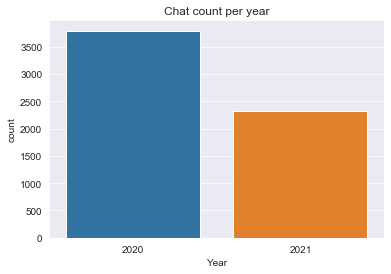

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid' )

sns.countplot(df.Year).set_title('Chat count per year')

There are more messages in 2020 than in 2021, that's obvious because we just started 2021

Text(0.5, 1.0, 'Chart frequecy per Month VS Year')

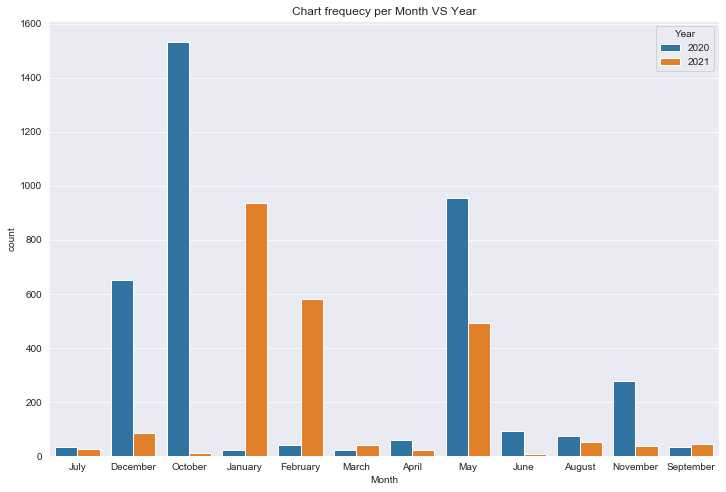

In [206]:
plt.figure(figsize=(12,8))
sns.countplot(df.Month, hue=df.Year).set_title('Chart frequecy per Month VS Year')

Most messages of 2020 are in October, then May followed by December

In [227]:
# Most active people on th group, those that chat most
df['Author'].value_counts().head(20)

Serubs                   652
Haniel                   539
Shittu Tosin MCB         414
Fagba                    402
General MCB              293
                        ... 
+234 816 792 8063          1
Adegbenro Mercy            1
+234 703 202 6579          1
Anthony Timileyin MCB      1
+234 809 969 1225          1
Name: Author, Length: 149, dtype: int64

In [185]:
# Ghost members who hadrly chat in the group
df['Author'].value_counts().tail(20)

Gbola Tosin                 2
+234 903 410 4689           2
Faleye                      2
Adeolu Adeyemo Messi MCB    2
Osborne                     2
Ibro MCB                    2
Ofi Seyi                    2
Oluchi                      1
Faithful Ay MCB             1
+234 807 461 7024           1
Olaide Mor                  1
Olaide Mcb                  1
+234 703 050 6490           1
Adeogo                      1
A Tawheed                   1
+234 816 792 8063           1
Adegbenro Mercy             1
+234 703 202 6579           1
Anthony Timileyin MCB       1
+234 809 969 1225           1
Name: Author, dtype: int64

In [228]:
df.drop(['Author'], axis=1).head()

,Date,Time,Message,Year,Month,Day,urlcount
0,2020-07-05,08:45,You were added,2020,July,5,0
1,2020-12-10,07:13,"🎂🎂🎂🎂🎂 Happy birthday, Adediran Christopher Ola...",2020,December,10,0
2,2020-12-10,08:22,"Happy Birthday Diran, may your years be long a...",2020,December,10,0
3,2020-12-10,08:43,Tnx Bro,2020,December,10,0
4,2020-12-10,08:43,Amen,2020,December,10,0


In [231]:
total_messages = df.shape[0]
print('Total messages in the group is: ', total_messages)

Total messages in the group is:  6117


In [232]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print('Total media messages in the group is: ',  media_messages)

Total media messages in the group is:  997


In [209]:
# def split_count(text):

#     emoji_list = []
#     data = regex.findall(r'\X', text)
#     for word in data:
#         if any(char in emoji.UNICODE_EMOJI for char in word):
#             emoji_list.append(word)

#     return emoji_list

# df["emoji"] = df["Message"].apply(split_count)

In [233]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [234]:
links = np.sum(df.urlcount)

In [236]:
print("My group")
print("Total messages in the group:",total_messages)
print("Total media in the group:",media_messages)
# print("Emojis:",emojis)
print("Toatl links in the group:",links)

My group
Total messages in the group: 6117
Total media in the group: 997
Toatl links in the group: 74


In [194]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [195]:
messages_df = df.drop(media_messages_df.index)

In [196]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5120 entries, 0 to 6116
Data columns (total 8 columns):
Date        5120 non-null datetime64[ns]
Time        5120 non-null object
Author      5017 non-null object
Message     5120 non-null object
Year        5120 non-null int64
Month       5120 non-null object
Day         5120 non-null int64
urlcount    5120 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 360.0+ KB


In [197]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [237]:
messages_df.drop(['Author'], axis=1).head()

,Date,Time,Message,Year,Month,Day,urlcount,Letter_Count,Word_Count,MessageCount
0,2020-07-05,08:45,You were added,2020,July,5,0,14,3,1
1,2020-12-10,07:13,"🎂🎂🎂🎂🎂 Happy birthday, Adediran Christopher Ola...",2020,December,10,0,129,21,1
2,2020-12-10,08:22,"Happy Birthday Diran, may your years be long a...",2020,December,10,0,65,12,1
3,2020-12-10,08:43,Tnx Bro,2020,December,10,0,7,2,1
4,2020-12-10,08:43,Amen,2020,December,10,0,4,1,1


In [216]:
messages_df.Letter_Count.value_counts()

2       219
3       184
14      142
19      138
4       122
       ... 
5425      1
633       1
629       1
557       1
709       1
Name: Letter_Count, Length: 278, dtype: int64

#### No of messages, media and links sent by some users in the group

In [242]:

l = ["User", "User", "User"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of User -')
#   print(f'Stats of {l[i]} -')  
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
#   emojis = sum(req_df['emoji'].str.len())
#   print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of User -
Messages Sent 125
Words per message 4.728
Media Messages Sent 83
Links Sent 0

Stats of User -
Messages Sent 356
Words per message 21.674157303370787
Media Messages Sent 46
Links Sent 2

Stats of User -
Messages Sent 156
Words per message 22.743589743589745
Media Messages Sent 24
Links Sent 0



### Word cloud

A word cloud, also known as a tag cloud or word art), is a simple visualization of data in which words are shown in varying sizes depending on how often they appear in text.

These are the most frequetly used words in the group 

There are 288103 words in all the messages.


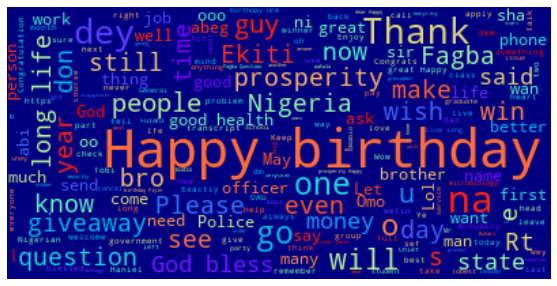

In [254]:
text = " ".join(review for review in messages_df.Message)
print('These are the most frequetly used words in the group', '\n')

print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='navy', colormap='rainbow').generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The two most frequently used words in the group are **Happy** & **birthday**

#### Frequently used words by some users

Author name


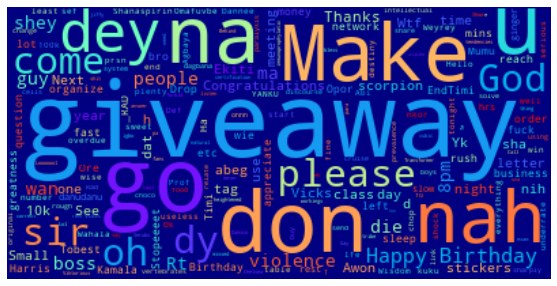

Author name


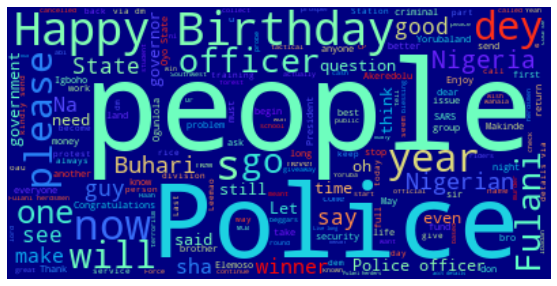

Author name


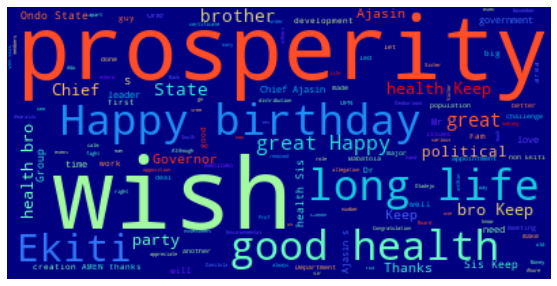

Author name


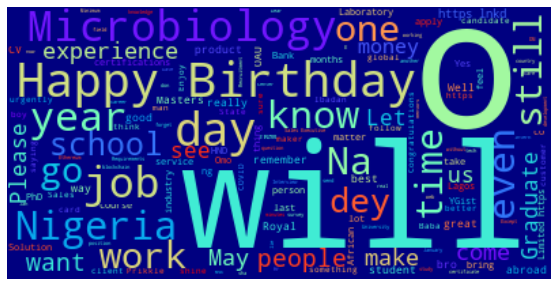

Author name


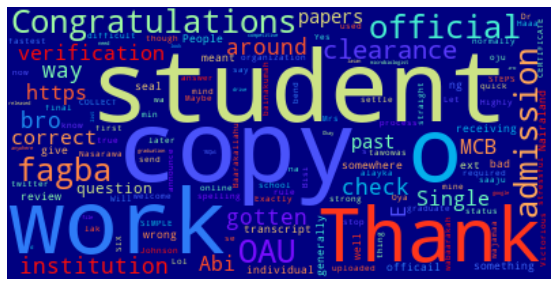

In [251]:
l = ["Rad", "Fagba", "Rep mcb", "Victorious", "~Aboo Ja'far~ SMARTLINK"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name')
  wordcloud = WordCloud(stopwords=stopwords, background_color='navy', colormap='rainbow').generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show();

For individual person

Author name


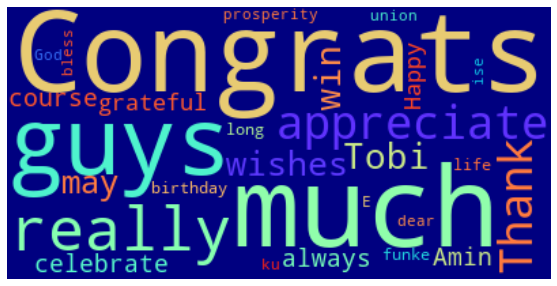

In [220]:
dummy_df = messages_df[messages_df['Author'] == '1234']
text = " ".join(review for review in dummy_df.Message)
stopwords = set(STOPWORDS)
#Generate a word cloud image
print('Author name')
wordcloud = WordCloud(stopwords=stopwords, background_color='navy', colormap='rainbow').generate(text)
#Display the generated image   
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

<h1><center>Thank you for checking out!</h1></center>